In [42]:
from os.path import join
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor


## 1. 데이터 불러오기

In [43]:
datapath = join('data','abalone.txt')
labelpath = join('data','abalone_attributes.txt')

#txt파일 읽기
columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')
    
# cloumns = attribute    
df = pd.read_csv(datapath, names = columns)
del df['Sex']

Y = df['Rings']
del df['Rings']

X = df

In [44]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## 2. 데이터 전처리

In [45]:
#Min-Max 정규화
for dim in X:
        X[dim] -= np.min(X[dim])
        X[dim] /= np.max(X[dim])

In [46]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503
std,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052
50%,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689
75%,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


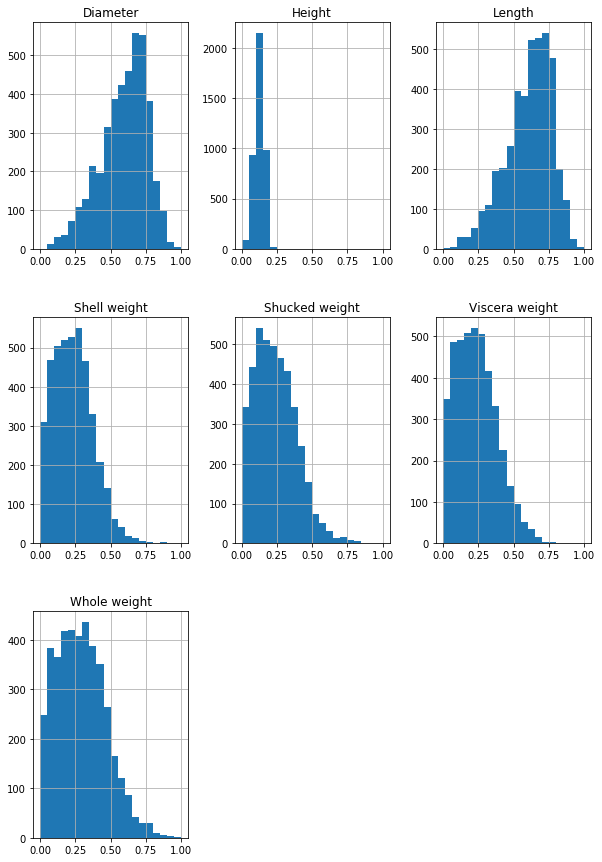

In [47]:
X.hist(bins = 20, figsize=(10, 15))
plt.show()

In [51]:
#label = ['Shell weight', 'Diameter', 'Height']
#X = df[label]

#X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X, df_rings, test_size=0.3, random_state = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

# input 대해 선형 회귀(모델 파라미터 추정)
X_train = X_train.values.tolist()
Y_train = Y_train.values.tolist()


## 3. Regression 

### 3.1 LinearRegression

### 3.1.1 Model

In [52]:
# 선형회귀 추정기 생성
lr = linear_model.LinearRegression() 
lr = lr.fit(X_train, Y_train)

In [53]:
# 회귀식으로 데이터의 결과 추정
lr_Y_pred = lr.predict(X_test)

In [54]:
# R2 scroe
print('R2 score: %.2f' % r2_score(Y_test, lr_Y_pred))

R2 score: 0.51


In [55]:
print(lr.coef_)
print(lr.intercept_)

[ -1.93484954   9.13152355  11.64056674  25.62819033 -30.25356482
  -6.67627957   8.36303915]
3.5867753627090444


### 3.1.2 시각화

[128612.6818361]


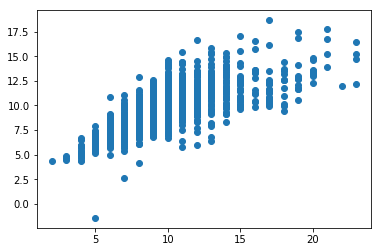

In [56]:
plt.scatter(x=Y_test, y=lr_Y_pred)
print(np.correlate(Y_test, lr_Y_pred))

### 3.2 DecisionTreeRgression

### 3.2.1 Model

In [120]:
# 결정트리 회귀 모델 생성
tr = DecisionTreeRegressor(max_depth=4)

In [121]:
tr.fit(X_train, Y_train)
tr_Y_pred = tr.predict(X_test)

In [122]:
print('R2 score: %.2f' % r2_score(Y_test, tr_Y_pred))

R2 score: 0.42


### 3.2.2 시각화

In [123]:

n_nodes = tr.tree_.node_count
children_left = tr.tree_.children_left
children_right = tr.tree_.children_right
feature = tr.tree_.feature
threshold = tr.tree_.threshold

#node_depth = 모든 분기의 깊이
#is_leaves = 해당 분기의 잎파리 노드 여부
#leaves_count = 잎파리 노드의 수

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
leaves_count = 0
#첫번째 분기의 ID는 -1이기 때문에 -1을 가진 stack 생성
stack = [(0, -1)]

#모든 분기를 순회하며 해당 분기의 깊이, 잎파리 여부를 파악
#전체 잎파리 노드의 수 조사
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        leaves_count += 1
        
print(np.max(node_depth))
print(leaves_count)
print(n_nodes)

4
16
31


In [124]:
#모든 분기의 정보를 출력
#tab을 활용하여 깊이를 확인할 수 있으며 각 분기가 어떤 변수의 어떤 값을 기준으로 이루어졌는지 확인할 수 있다.
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
        

node=0 test node: go to node 1 if X[:, 6] <= 0.16567015647888184 else to node 16.
	node=1 test node: go to node 2 if X[:, 6] <= 0.06601893529295921 else to node 9.
		node=2 test node: go to node 3 if X[:, 0] <= 0.25337837636470795 else to node 6.
			node=3 test node: go to node 4 if X[:, 5] <= 0.012837393209338188 else to node 5.
				node=4 leaf node.
				node=5 leaf node.
			node=6 test node: go to node 7 if X[:, 1] <= 0.28151261806488037 else to node 8.
				node=7 leaf node.
				node=8 leaf node.
		node=9 test node: go to node 10 if X[:, 6] <= 0.1098654679954052 else to node 13.
			node=10 test node: go to node 11 if X[:, 4] <= 0.07178883627057076 else to node 12.
				node=11 leaf node.
				node=12 leaf node.
			node=13 test node: go to node 14 if X[:, 4] <= 0.1555144563317299 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
	node=16 test node: go to node 17 if X[:, 6] <= 0.34653711318969727 else to node 24.
		node=17 test node: go to node 18 if X[:, 4] <= 0.20393409579

[128722.82822592]


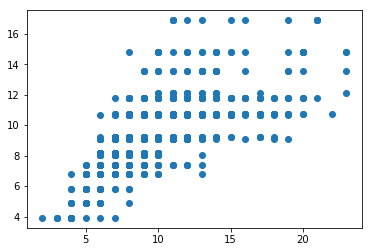

In [125]:
from sklearn.tree import export_graphviz
export_graphviz(tr, out_file='DTregression_tree.dot')
plt.scatter(x=Y_test, y=tr_Y_pred)
print(np.correlate(Y_test, tr_Y_pred))

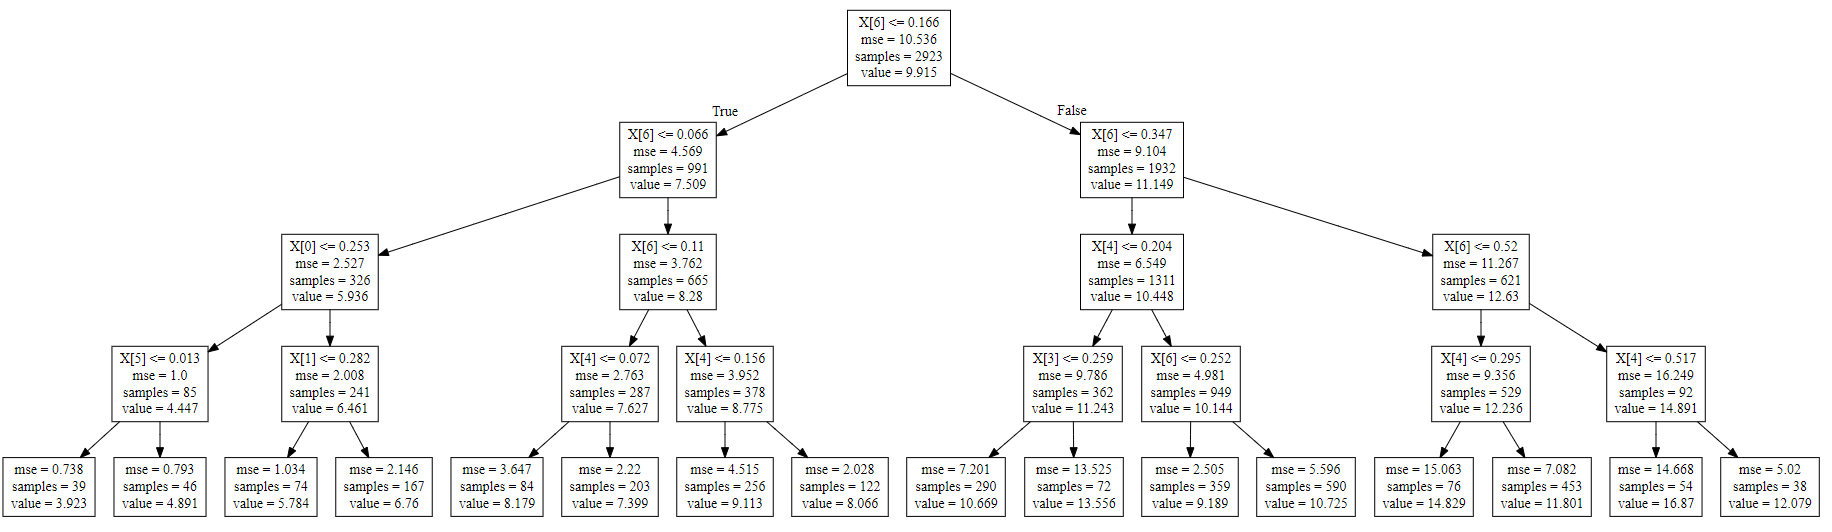

### 3.3 NN Regression

### 3.3.1 Model

In [62]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)
nn_model.fit(X=X_train, y=Y_train)

nn_Y_pred = nn_model.predict(X=X_test)

print('R2 score: %.2f' % r2_score(Y_test, nn_Y_pred))

R2 score: 0.42


### 3.3.2 시각화

[128818.60496791]


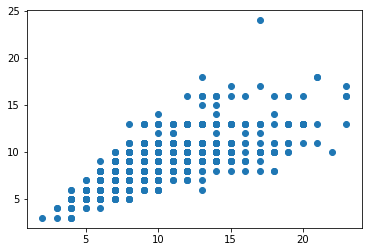

In [63]:
plt.scatter(x=Y_test, y=nn_Y_pred)
print(np.correlate(Y_test, tr_Y_pred))